# Classification: MNIST

BUSMGT 7247

This notebook includes code from the Chapter 3 notebook provided by *Hands-On Machine Learning*.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (train_test_split, cross_val_score,
                                     cross_validate, GridSearchCV)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             confusion_matrix, plot_confusion_matrix,
                             precision_recall_curve, roc_curve,
                             plot_precision_recall_curve, plot_roc_curve)

# To make this notebook'soutput stable across runs
np.random.seed(100)

# To plot pretty figures
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Load MNIST data

In [2]:
from sklearn import datasets

# Load data
X, y = datasets.fetch_openml('mnist_784', version=1, return_X_y=True,
                             as_frame=False)
X.shape

(70000, 784)

In [3]:
# Take random subset of data for quicker processing
sample = np.random.choice(X.shape[0], 5000)
X = X[sample]
y = y[sample]

X.shape

(5000, 784)

In [4]:
28*28

784

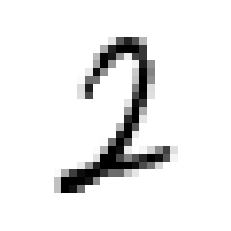

In [5]:
some_digit = X[1]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [6]:
y[1]

'2'

In [7]:
with np.printoptions(threshold=np.inf, edgeitems=10, linewidth=1000,
                     formatter=dict(float=lambda x: "%3.0f" % x)):
    print(X[1].reshape(28, 28))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  28 167 221 172  72   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  85 221 254 254 254 201   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  69 249 232 109  17 186 201   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  94 252 102   0   0  15 225 110   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  23 242 112   0   0   0  54 250 123   

In [8]:
X.shape

(5000, 784)

In [9]:
# Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000)

In [10]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

## Binary classification

In [11]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')
y_train_5[1:10]

array([False, False, False, False, False, False, False, False, False])

In [12]:
# Evaluate k-Nearest Neighbors for binary "is a 5?" with k = 1
knn_clf = KNeighborsClassifier(n_neighbors=1)
s = cross_validate(knn_clf, X_train, y_train_5, cv=4,
                   scoring=['accuracy', 'precision', 'recall'])

print((f'Accuracy: {s["test_accuracy"].mean():.4f}\n'
       f'Precision: {s["test_precision"].mean():.4f}\n'
       f'Recall: {s["test_recall"].mean():.4f}'))

Accuracy: 0.9832
Precision: 0.9120
Recall: 0.8924


In [13]:
# Evaluate k-Nearest Neighbors for binary "is a 5?" with k = 10
knn_clf = KNeighborsClassifier(n_neighbors=10)
s = cross_validate(knn_clf, X_train, y_train_5, cv=4,
                   scoring=['accuracy', 'precision', 'recall'])

print((f'Accuracy: {s["test_accuracy"].mean():.4f}\n'
       f'Precision: {s["test_precision"].mean():.4f}\n'
       f'Recall: {s["test_recall"].mean():.4f}'))

Accuracy: 0.9800
Precision: 0.9611
Recall: 0.7994


### Hyperparameter grid search

In [14]:
parameters = {
    'n_neighbors':range(1, 51)
}

knn_clf = KNeighborsClassifier()
grid = GridSearchCV(knn_clf, param_grid=parameters,
                    scoring='accuracy')
grid.fit(X_train, y_train_5)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51)}, scoring='accuracy')

In [15]:
print(f'Accuracy: {grid.best_score_:.3f}')
grid.best_params_

Accuracy: 0.985


{'n_neighbors': 3}

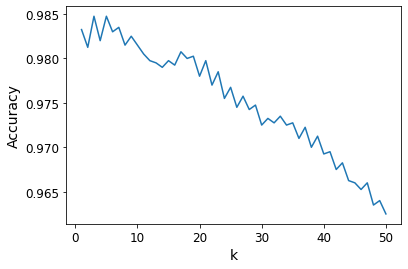

In [16]:
plt.plot(parameters['n_neighbors'],
         grid.cv_results_['mean_test_score'])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

### Precision-recall trade-off

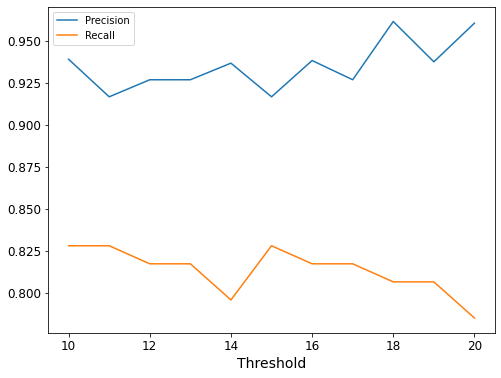

In [17]:
# Manually create a precision-recall plot
ks = range(10, 21)
precisions = []
recalls = []

for k in ks:
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train_5)
    y_pred_5 = knn_clf.predict(X_test)
    precisions += [precision_score(y_test_5, y_pred_5)]
    recalls += [recall_score(y_test_5, y_pred_5)]

plt.subplots(figsize=(8, 6))
plt.plot(ks, precisions)
plt.plot(ks, recalls)
plt.xlabel('Threshold')
plt.legend(['Precision', 'Recall'])
plt.show()

### Precision-recall trade-off for fixed k

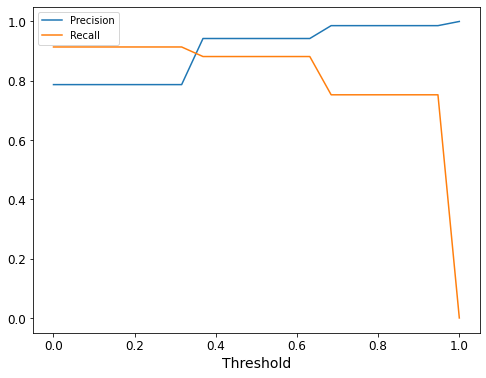

In [18]:
# Use optimized value of k
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train_5)

# Manually create a precision-recall plot for the test data
y_score = knn_clf.predict_proba(X_test)[:, 1]

# Range of thresholds for assigning an instance to the positive class (5)
thresholds = np.linspace(0.0, 1.0, num=20)

precisions = []
recalls = []
for t in thresholds:
    y_pred = (y_score > t)
    precisions += [precision_score(y_test_5, y_pred,
                                   zero_division=1)]
    recalls += [recall_score(y_test_5, y_pred)]

plt.subplots(figsize=(8, 6))
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.xlabel('Threshold')
plt.legend(['Precision', 'Recall'])
plt.show()

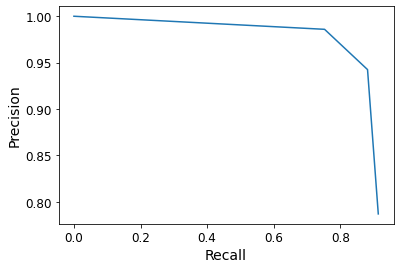

In [19]:
# Plot precision against recall
plt.plot(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

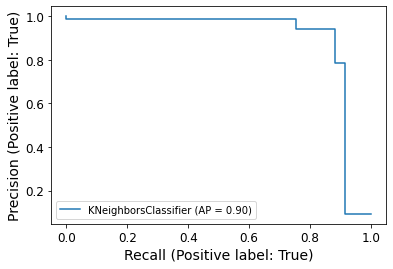

In [20]:
# Use sklearn for precision-recall plot
plot_precision_recall_curve(knn_clf, X_test, y_test_5)
plt.show()

## Multiclass classification

In [21]:
# Fit k-Nearest Neighbors model for the multiclass problem with k = 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [22]:
accuracy_score(y_test, y_pred)

0.94

In [23]:
# Why wouldn't the following line of code work?
# precision_score(y_test, y_pred)

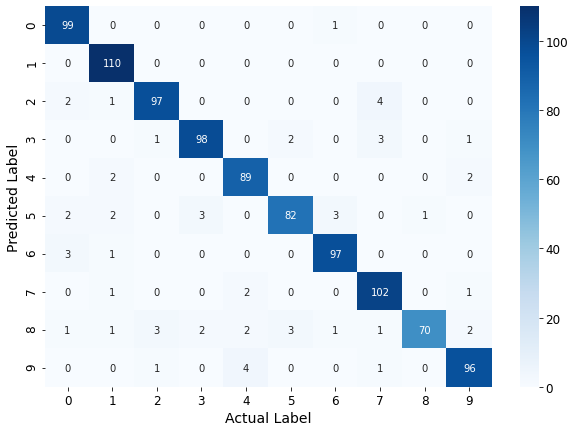

In [24]:
# Visualize performance with a confusion matrix
dfcm = pd.DataFrame(confusion_matrix(y_test, y_pred))

plt.figure(figsize = (10, 7))
sns.heatmap(dfcm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.show()